In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [6]:
covid = pd.read_csv('/content/drive/MyDrive/covid/owid-covid-data2.csv')

In [7]:
covid.head()
# location 나라정보 , date: 날짜정보, total_cases:누적 확진자수, new_cases:신규 확진자수,

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## 2. 데이터 탐색 및 전처리

In [8]:
covid.columns #59개 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

##### 데이터 크기, 컬럼들의 개수와 타입 등 확인

In [13]:
covid.info() #date 변수가 datetime인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203569 entries, 0 to 203568
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    203569 non-null  object 
 1   continent                                   191780 non-null  object 
 2   location                                    203569 non-null  object 
 3   date                                        203569 non-null  object 
 4   total_cases                                 195494 non-null  float64
 5   new_cases                                   195154 non-null  float64
 6   new_cases_smoothed                          193977 non-null  float64
 7   total_deaths                                176773 non-null  float64
 8   new_deaths                                  176721 non-null  float64
 9   new_deaths_smoothed                         175559 non-null  float64
 

##### date 컬럼을 datetime으로 변경하기

In [14]:
covid['date'] =  pd.to_datetime(covid.date , format='%Y-%m-%d')

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203569 entries, 0 to 203568
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    203569 non-null  object        
 1   continent                                   191780 non-null  object        
 2   location                                    203569 non-null  object        
 3   date                                        203569 non-null  datetime64[ns]
 4   total_cases                                 195494 non-null  float64       
 5   new_cases                                   195154 non-null  float64       
 6   new_cases_smoothed                          193977 non-null  float64       
 7   total_deaths                                176773 non-null  float64       
 8   new_deaths                                  176721 non-null  float64      

'United States','Brazil','France','South Korea' 만 선택

In [15]:
covid = covid[covid.location.isin(['United States','Brazil','France','South Korea'])]

'location','date','total_cases','new_cases' 컬럼만 선택

In [17]:
covid=covid[['location','date','total_cases','new_cases']]

# 요약 및 그래프 시각화


In [25]:
#매월 마지막 날짜 데이터만 선택
ex1 = covid[covid.date.isin(pd.date_range(start= covid.date.min(),
                                    end=covid.date.max(),
                                    freq='D'))]  #M은 월의 마지막날, D는 날짜

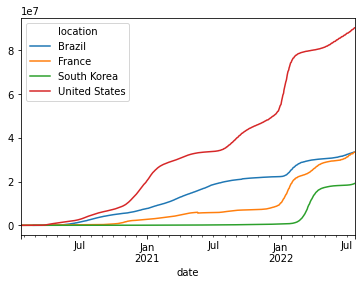

In [26]:
#그래프 그려주기
ex1.set_index(['date' ,'location']).unstack()['total_cases'].plot()

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a) 컬럼 추가하기

In [27]:
covid['year'] = covid['date'].apply(lambda x: x.strftime('%Y'))
covid['month'] = covid['date'].apply(lambda x: x.strftime('%m'))
covid['day'] = covid['date'].apply(lambda x: x.strftime('%d'))
covid['weekNumber'] = covid['date'].apply(lambda x: x.strftime('%U'))
covid['weekDay'] = covid['date'].apply(lambda x: x.strftime('%a'))

#쿼터는 없음 ㅋㅋㅋㅋㅋ ㅠㅠ

In [32]:
#분기정보 추가법
covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)

In [33]:
covid.head()

,location,date,total_cases,new_cases,year,month,day,weekNumber,weekDay,quarter
25393,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed,1
25394,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu,1
25395,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri,1
25396,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat,1
25397,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun,1


요일별 신규확진자수 구하기



In [36]:
covid.pivot_table(index='weekDay', columns ='location',aggfunc='sum', values='new_cases')

location,Brazil,France,South Korea,United States
weekDay,,,,
Fri,5863052.0,5199978.0,2802817.0,16066527.0
Mon,3085318.0,2495634.0,2728845.0,15458678.0
Sat,4538721.0,4559848.0,2591590.0,8492796.0
Sun,2508581.0,3679596.0,1817696.0,7463502.0
Thu,6002158.0,5733457.0,2856336.0,14476429.0
Tue,5600813.0,6336472.0,3351037.0,13293658.0
Wed,5887631.0,5923555.0,3099174.0,15158795.0


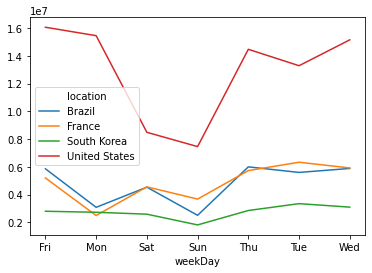

In [38]:
covid.pivot_table(index='weekDay', columns ='location',aggfunc='sum', values='new_cases').plot()

In [39]:
covid.pivot_table(index='quarter', columns ='location',aggfunc='sum', values='new_cases')

location,Brazil,France,South Korea,United States
quarter,,,,
1,12747908.0,17727721.0,12792220.0,35902471.0
2,9640000.0,7167056.0,5050187.0,13169176.0
3,7375222.0,3970542.0,1045728.0,17078382.0
4,3723144.0,5063221.0,359360.0,24260356.0


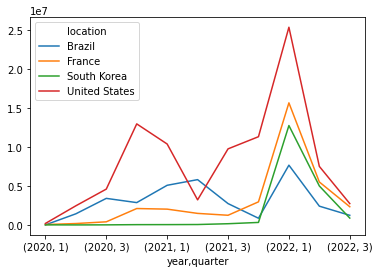

In [41]:
covid.pivot_table(index=['year','quarter'], columns ='location',aggfunc='sum', values='new_cases').plot()